In [179]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# 统计量及其抽样分布

## 统计量
设(X1,X2,...,Xn)是来自总体的一个样本，g(X1,X2,...,Xn)是样本的函数，若样本函数中不含任何未知参数，则称g(X1,X2,...,Xn)g是一个统计量。

### 均值 方差

In [11]:
data = np.random.randint(1, 11, 100)
print("均值："+str(data.mean()))
print("方差："+str(data.var()))

均值：5.3
方差：7.670000000000001


In [10]:
data1 = np.random.randint(2, 21, 100)
print("均值1："+str(data1.mean()))
print("方差1："+str(data1.var()))

均值1：11.47
方差1：26.149099999999997


### 样本变异系数

In [18]:
V1 = data.std()/data.mean()
V2 = data1.std()/data1.mean()
print("V1:"+str(V1))
print("V2:"+str(V2)) #data2离散程度较小

V1:0.5225427329858955
V2:0.44582555106171146


## 抽样分布

### 回顾正太分布

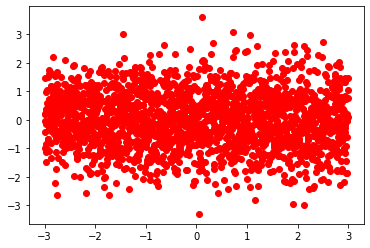

In [172]:
#散点图
dot_nums = 2000
y = np.random.normal(0,1,dot_nums)
x = np.arange(-3,3,6.0 /dot_nums)
plt.scatter(x,y,color = "red")
plt.show()

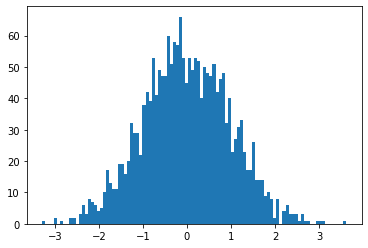

In [173]:
#频数直方图
plt.hist(y,bins = 100)
plt.show()

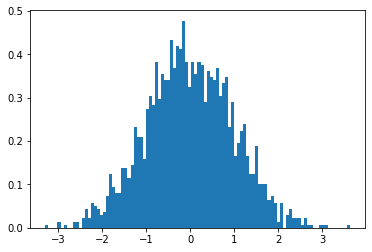

In [174]:
#频率直方图
n,bins,patched = plt.hist(y,bins = 100,density=True)
plt.show()

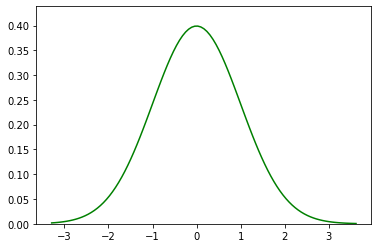

In [201]:
y = scipy.stats.norm.pdf(bins,0,1) 
plt.plot(bins,y,'g-',1)
dy = (max(y) - min(y)) * 0.1
plt.ylim((0,max(y) + dy))
plt.show()

### 卡方分布

[ 5.92104075 19.33742923 45.31474662]
True


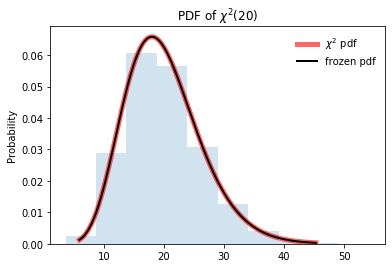

In [188]:
def chi2_distribution(df=1):
    """
    卡方分布，在实际的定义中只有一个参数df，即定义中的n
    :param df: 自由度，也就是该分布中独立变量的个数
    :return:
    """
    fig, ax = plt.subplots(1, 1)

    # 直接传入参数, Display the probability density function (pdf)
    x = np.linspace(stats.chi2.ppf(0.001, df),
                    stats.chi2.ppf(0.999, df), 200)
    ax.plot(x, stats.chi2.pdf(x, df), 'r-',
            lw=5, alpha=0.6, label=r'$\chi^2$ pdf')

    # 从冻结的均匀分布取值, Freeze the distribution and display the frozen pdf
    chi2_dis = stats.chi2(df=df)
    ax.plot(x, chi2_dis.pdf(x), 'k-',
            lw=2, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = chi2_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [ 2.004  4.     5.996]

    # Check accuracy of cdf and ppf
    print(np.allclose([0.001, 0.5, 0.999], chi2_dis.cdf(vals)))  # Ture

    # Generate random numbers
    r = chi2_dis.rvs(size=10000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    plt.title(r'PDF of $\chi^2$({})'.format(df))
    ax.legend(loc='best', frameon=False)
    plt.show()

chi2_distribution(df=20)

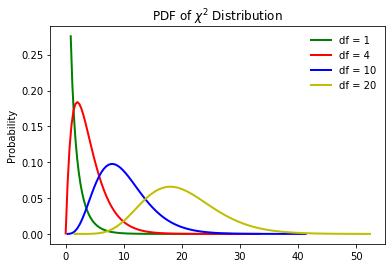

In [191]:
def diff_chi2_dis():
    """
    不同参数下的卡方分布
    :return:
    """
    # chi2_dis_0_5 = stats.chi2(df=0.5)
    chi2_dis_1 = stats.chi2(df=1)
    chi2_dis_4 = stats.chi2(df=4)
    chi2_dis_10 = stats.chi2(df=10)
    chi2_dis_20 = stats.chi2(df=20)

    # x1 = np.linspace(chi2_dis_0_5.ppf(0.01), chi2_dis_0_5.ppf(0.99), 100)
    x2 = np.linspace(chi2_dis_1.ppf(0.65), chi2_dis_1.ppf(0.9999999), 100)
    x3 = np.linspace(chi2_dis_4.ppf(0.000001), chi2_dis_4.ppf(0.999999), 100)
    x4 = np.linspace(chi2_dis_10.ppf(0.000001), chi2_dis_10.ppf(0.99999), 100)
    x5 = np.linspace(chi2_dis_20.ppf(0.00000001), chi2_dis_20.ppf(0.9999), 100)
    fig, ax = plt.subplots(1, 1)
    # ax.plot(x1, chi2_dis_0_5.pdf(x1), 'b-', lw=2, label=r'df = 0.5')
    ax.plot(x2, chi2_dis_1.pdf(x2), 'g-', lw=2, label='df = 1')
    ax.plot(x3, chi2_dis_4.pdf(x3), 'r-', lw=2, label='df = 4')
    ax.plot(x4, chi2_dis_10.pdf(x4), 'b-', lw=2, label='df = 10')
    ax.plot(x5, chi2_dis_20.pdf(x5), 'y-', lw=2, label='df = 20')
    plt.ylabel('Probability')
    plt.title(r'PDF of $\chi^2$ Distribution')
    ax.legend(loc='best', frameon=False)
    plt.show()

diff_chi2_dis()

### t分布

[-3.55180834e+00  6.72145055e-17  3.55180834e+00]
True


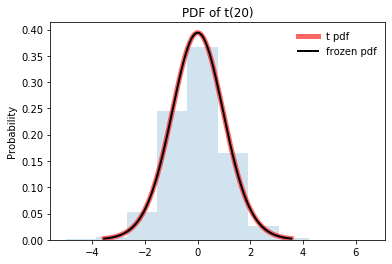

In [195]:
def t_distribution(df=1.0):
    """
    t分布，在实际的定义中只有一个参数df，即定义中的n
    :param df: 自由度，也就是该分布包含的卡方分布中独立变量的个数
    :return:
    """

    fig, ax = plt.subplots(1, 1)

    # 直接传入参数, Display the probability density function (pdf)
    x = np.linspace(stats.t.ppf(0.001, df),
                    stats.t.ppf(0.999, df), 200)
    ax.plot(x, stats.t.pdf(x, df), 'r-',
            lw=5, alpha=0.6, label=r't pdf')

    # 从冻结的t分布取值, Freeze the distribution and display the frozen pdf
    t_dis = stats.t(df=df)
    ax.plot(x, t_dis.pdf(x), 'k-',
            lw=2, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = t_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [ -3.55180834e+00   6.72145055e-17   3.55180834e+00]

    # Check accuracy of cdf and ppf
    print(np.allclose([0.001, 0.5, 0.999], t_dis.cdf(vals)))  # Ture

    # Generate random numbers
    r = t_dis.rvs(size=10000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    plt.title(r'PDF of t({})'.format(df))
    ax.legend(loc='best', frameon=False)
    plt.show()

t_distribution(df=20)

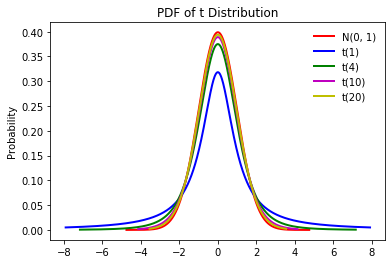

In [196]:
def diff_t_dis():
    """
    不同参数下的t分布
    :return:
    """
    norm_dis = stats.norm()
    t_dis_1 = stats.t(df=1)
    t_dis_4 = stats.t(df=4)
    t_dis_10 = stats.t(df=10)
    t_dis_20 = stats.t(df=20)

    x1 = np.linspace(norm_dis.ppf(0.000001), norm_dis.ppf(0.999999), 1000)
    x2 = np.linspace(t_dis_1.ppf(0.04), t_dis_1.ppf(0.96), 1000)
    x3 = np.linspace(t_dis_4.ppf(0.001), t_dis_4.ppf(0.999), 1000)
    x4 = np.linspace(t_dis_10.ppf(0.001), t_dis_10.ppf(0.999), 1000)
    x5 = np.linspace(t_dis_20.ppf(0.001), t_dis_20.ppf(0.999), 1000)
    fig, ax = plt.subplots(1, 1)
    ax.plot(x1, norm_dis.pdf(x1), 'r-', lw=2, label=r'N(0, 1)')
    ax.plot(x2, t_dis_1.pdf(x2), 'b-', lw=2, label='t(1)')
    ax.plot(x3, t_dis_4.pdf(x3), 'g-', lw=2, label='t(4)')
    ax.plot(x4, t_dis_10.pdf(x4), 'm-', lw=2, label='t(10)')
    ax.plot(x5, t_dis_20.pdf(x5), 'y-', lw=2, label='t(20)')
    plt.ylabel('Probability')
    plt.title(r'PDF of t Distribution')
    ax.legend(loc='best', frameon=False)
    plt.show()

diff_t_dis()

### F分布

[ 0.02081053  0.89881713 11.28275151]
True


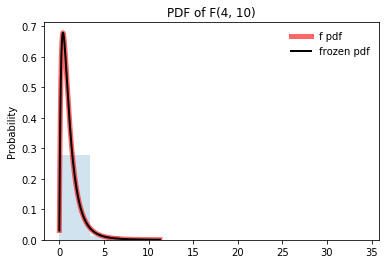

In [199]:
def f_distribution(dfn=4, dfd=10):
    """
    F分布，有两个参数dfn, dfd，分别表示定义中的n1和n2
    :param dfn: 第一自由度，分子中卡方分布的自由度
    :param dfd: 第二自由度，分母中卡方分布的自由度
    :return:
    """

    fig, ax = plt.subplots(1, 1)

    # 直接传入参数, Display the probability density function (pdf)
    x = np.linspace(stats.f.ppf(0.0001, dfn, dfd),
                    stats.f.ppf(0.999, dfn, dfd), 200)
    ax.plot(x, stats.f.pdf(x, dfn, dfd), 'r-',
            lw=5, alpha=0.6, label=r'f pdf')

    # 从冻结的均匀分布取值, Freeze the distribution and display the frozen pdf
    f_dis = stats.f(dfn=dfn, dfd=dfd)
    ax.plot(x, f_dis.pdf(x), 'k-',
            lw=2, label='frozen pdf')

    # 计算ppf分别等于0.001, 0.5, 0.999时的x值
    vals = f_dis.ppf([0.001, 0.5, 0.999])
    print(vals)  # [  0.02081053   0.89881713  11.28275151]

    # Check accuracy of cdf and ppf
    print(np.allclose([0.001, 0.5, 0.999], f_dis.cdf(vals)))  # Ture

    # Generate random numbers
    r = f_dis.rvs(size=10000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    plt.ylabel('Probability')
    plt.title(r'PDF of F({}, {})'.format(dfn, dfd))
    ax.legend(loc='best', frameon=False)
    plt.savefig('f_dist_pdf2.png', dip=200)

f_distribution(dfn=4, dfd=10)

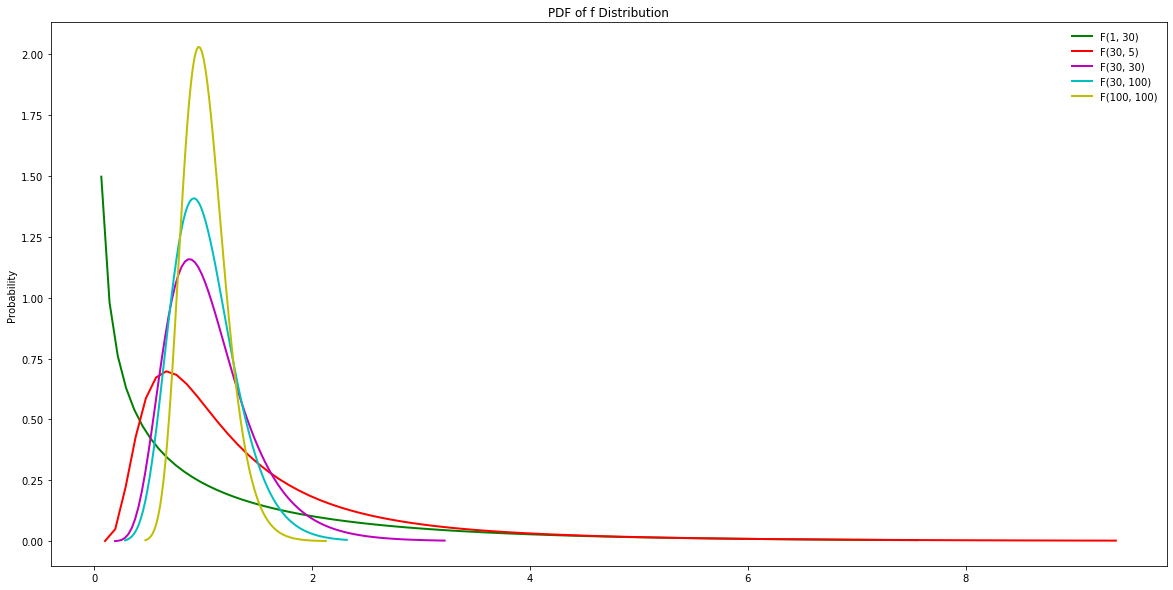

In [200]:
def diff_f_dis():
    """
    不同参数下的F分布
    :return:
    """
#    f_dis_0_5 = stats.f(dfn=10, dfd=1)
    f_dis_1_30 = stats.f(dfn=1, dfd=30)
    f_dis_30_5 = stats.f(dfn=30, dfd=5)
    f_dis_30_30 = stats.f(dfn=30, dfd=30)
    f_dis_30_100 = stats.f(dfn=30, dfd=100)
    f_dis_100_100 = stats.f(dfn=100, dfd=100)

#    x1 = np.linspace(f_dis_0_5.ppf(0.01), f_dis_0_5.ppf(0.99), 100)
    x2 = np.linspace(f_dis_1_30.ppf(0.2), f_dis_1_30.ppf(0.99), 100)
    x3 = np.linspace(f_dis_30_5.ppf(0.00001), f_dis_30_5.ppf(0.99), 100)
    x4 = np.linspace(f_dis_30_30.ppf(0.00001), f_dis_30_30.ppf(0.999), 100)
    x6 = np.linspace(f_dis_30_100.ppf(0.0001), f_dis_30_100.ppf(0.999), 100)
    x5 = np.linspace(f_dis_100_100.ppf(0.0001), f_dis_100_100.ppf(0.9999), 100)
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#    ax.plot(x1, f_dis_0_5.pdf(x1), 'b-', lw=2, label=r'F(0.5, 0.5)')
    ax.plot(x2, f_dis_1_30.pdf(x2), 'g-', lw=2, label='F(1, 30)')
    ax.plot(x3, f_dis_30_5.pdf(x3), 'r-', lw=2, label='F(30, 5)')
    ax.plot(x4, f_dis_30_30.pdf(x4), 'm-', lw=2, label='F(30, 30)')
    ax.plot(x6, f_dis_30_100.pdf(x6), 'c-', lw=2, label='F(30, 100)')
    ax.plot(x5, f_dis_100_100.pdf(x5), 'y-', lw=2, label='F(100, 100)')

    plt.ylabel('Probability')
    plt.title(r'PDF of f Distribution')
    ax.legend(loc='best', frameon=False)
    plt.savefig('f_diff_pdf.png', dip=500)
    plt.show()

diff_f_dis()

## 中心极限定理

In [73]:
#模拟掷骰子的情况
random_data = np.random.randint(1, 7, 10000000)
print(random_data.mean()) # 打印平均值
print(random_data.std())  # 打印标准差

3.4996283
1.7076455316719301


In [74]:
df = pd.DataFrame(random_data)
dfv = df[0].value_counts()

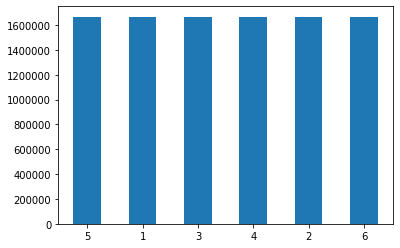

In [75]:
p1 = plt.bar(range(len(dfv)), height=dfv.values, width=0.5,tick_label=dfv.index)
# 展示图形
plt.show()

In [76]:
sample1 = []
size = len(random_data)
for i in range(0,  10):
    sample1.append(random_data[int(np.random.random() * size)])
arr1 = np.asarray(sample1)
print(arr1) # 打印出来
print(arr1.mean()) # 打印平均值
print(arr1.std())  # 打印标准差

[4 1 6 1 2 4 1 3 5 6]
3.3
1.9000000000000001


这个结果和上面的标准差相差比较多，但是如果我有1000组样本数据：

In [82]:
samples = []
samples_mean = []
samples_std = []
for i in range(0, 1000):
    sample = []
    for j in range(0, 50):
        sample.append(random_data[int(np.random.random() * size)])
    sample_np = np.array(sample)
    samples_mean.append(sample_np.mean())
    samples_std.append(sample_np.std())
    samples.append(sample_np)
samples_mean_np = np.array(samples_mean)
samples_std_np = np.array(samples_std)
print(samples_mean_np[0:10])
print(samples_std_np[0:10])

[3.48 3.34 3.64 3.54 3.94 3.44 3.28 3.66 3.14 3.72]
[1.78033705 1.77324561 1.62185079 1.59009434 1.65420676 1.6390241
 1.73251263 1.70423003 1.53635933 1.63755916]


In [69]:
print(samples_mean_np.max())
print(samples_mean_np.min())
bins = np.linspace(samples_mean_np.min(),samples_mean_np.max(),10)
print(bins)
score_cut = pd.cut(samples_mean_np,bins =  bins.tolist())
score_cut 

4.24
2.72
[2.72       2.88888889 3.05777778 3.22666667 3.39555556 3.56444444
 3.73333333 3.90222222 4.07111111 4.24      ]


[(3.564, 3.733], (3.564, 3.733], (3.227, 3.396], (3.564, 3.733], (3.227, 3.396], ..., (3.564, 3.733], (3.227, 3.396], (3.564, 3.733], (3.396, 3.564], (3.564, 3.733]]
Length: 1000
Categories (9, interval[float64]): [(2.72, 2.889] < (2.889, 3.058] < (3.058, 3.227] < (3.227, 3.396] ... (3.564, 3.733] < (3.733, 3.902] < (3.902, 4.071] < (4.071, 4.24]]

In [70]:
df1 = pd.DataFrame(samples_mean_np)
pd.value_counts(score_cut,sort=False)

(2.72, 2.889]       6
(2.889, 3.058]     33
(3.058, 3.227]    102
(3.227, 3.396]    185
(3.396, 3.564]    277
(3.564, 3.733]    227
(3.733, 3.902]    124
(3.902, 4.071]     36
(4.071, 4.24]       9
dtype: int64

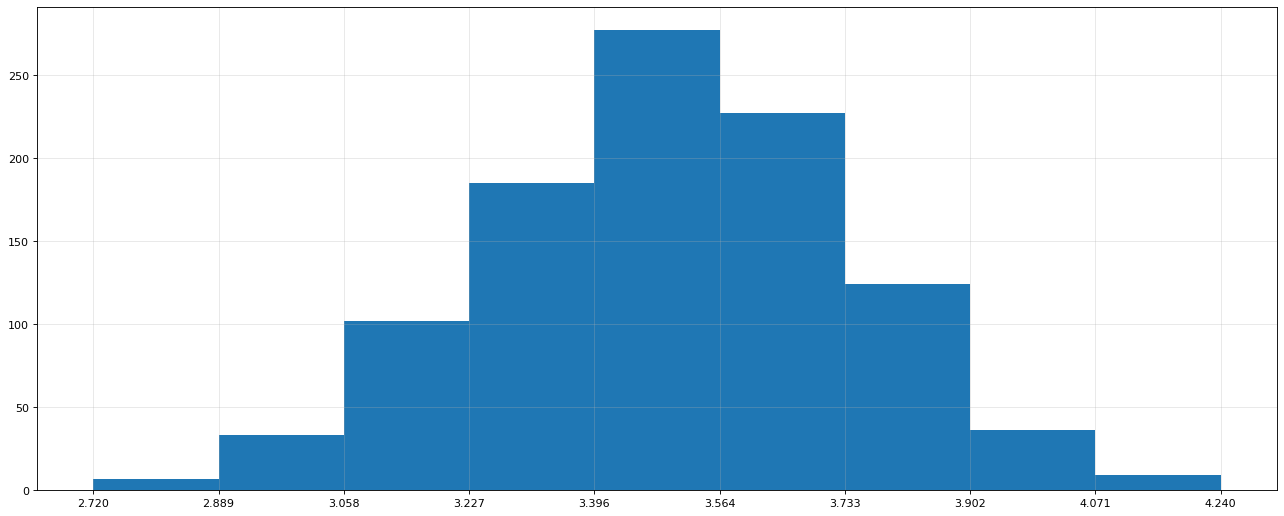

In [71]:
plt.figure(figsize=(20, 8), dpi=80) # 设置图片大小
plt.hist(samples_mean_np, bins,label=score_cut) # 加上normed=True属性之后变为频率分布直方图
# 设置x轴的刻度
plt.xticks(bins)
plt.grid(alpha=0.3)
plt.show()

In [86]:
print("平均值实际值："+str(random_data.mean())) # 打印平均值
print("标准差实际值："+str(random_data.std()))  # 打印标准差
print("中心极限平均值的平均值："+str(samples_mean_np.mean())) # 这个值和实际值相差不多
print("中心极限平均值的标准差："+str(samples_mean_np.std()))   
print("预估原来的标准差为："+str(samples_mean_np.std()*50**0.5)) 

平均值实际值：3.4996283
标准差实际值：1.7076455316719301
中心极限平均值的平均值：3.49838
中心极限平均值的标准差：0.23431469352134107
预估原来的标准差为：1.6568550872058787
